In [1]:
setwd('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')
library(ggplot2)

In [2]:
makeGeneList <- function(filename){
    gl <- readr::read_csv(filename)
    rank <- gl$rank
    rank[rank == Inf] = 300
    rank[rank == -Inf] = -300
    names(rank) <- gl$index
    rank <- rev(sort(rank))
    gl <- rank
}

In [3]:
comparisons = list()
celltypes = list.files('DEG/1.5MIU_vs_untreated')
groups = c('1.5MIU_vs_untreated', '2.5MIU_vs_untreated')
for (c in celltypes){
    for (g in groups){
        comparisons[[gsub('.csv', '', c)]][[g]] = makeGeneList(paste0('DEG/',g,'/',c))
    }
}

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  index = col_character(),
  rank = col_double()
)




In [4]:
library(fgsea)

In [5]:
h <- as.list(kelvinny::parse_gmt("../../scripts/data/h.all.v7.3.symbols.gmt"))

In [6]:
res = list()
for (c in gsub('.csv', '', celltypes)){
    for (g in groups){
        res[[c]][[g]] <- fgseaMultilevel(pathways = h, stats = comparisons[[c]][[g]], minSize = 0, maxSize =1000)
    }
}

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.2% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.19% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.1% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.44% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pat

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.62% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (1.25% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (19.54% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (39.14% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats

In [7]:
for (c in gsub('.csv', '', celltypes)){
    for (g in groups){
        res[[c]][[g]] <- as.data.frame(res[[c]][[g]])
    }
}

In [8]:
result = res

# names(result) <- gsub('.csv', "",files)
for(i in 1:length(comparisons)){
    result[[i]] <- lapply(result[[i]], function(x){
    x$ranking <- -log10(x$pval)*sign(x$NES) 
    x <- x[order(x$pathway), ]
    return(x)
})
}

In [9]:
result <- lapply(result ,function(x){
    x[['1.5MIU_vs_untreated']]$group = "1.5MIU"
    x[['2.5MIU_vs_untreated']]$group = "2.5MIU"
    return(x)
})

In [10]:
result2 <- lapply(result, function(x) {
    y <- do.call(rbind, x)
    return(y)
})

In [11]:
plotGSEA_Hallmark <- function(gsea, group_ref = NULL, cols = NULL, xlim = NULL, newlabels = NULL, keep_significant_only = FALSE, jitter = FALSE) {
    require(ggplot2)
    gsea$NES[which(is.na(gsea$NES))] <- 0
    gsea$pval[which(is.na(gsea$pval))] <- 1
    gsea$padj[which(is.na(gsea$padj))] <- 1
    gsea$ranking[which(is.na(gsea$ranking))] <- 0
    gsea <- gsea[order(gsea$ranking),]
    gsea_spl <- split(gsea, gsea$group)
    if(!is.null(group_ref)){
        gsea_spl[[group_ref]] <- gsea_spl[[group_ref]][order(gsea_spl[[group_ref]]$ranking),]
        gsea_spl[[group_ref]]$ranking <- gsea_spl[[group_ref]]$ranking*999
    } else {
        gsea_spl[[2]] <- gsea_spl[[2]]$ranking*999
    }
    names(gsea_spl) <- NULL

    gsea <- do.call(rbind, gsea_spl)
    
    if (keep_significant_only){
        gseax <- split(gsea, gsea$pathway)
        for (i in 1:length(gseax)){
            if (all(gseax[[i]]$pval >= 0.05)|all(gseax[[i]]$padj >=0.25)){
                gseax[[i]] <- NA        
            }
        }
        gseax <- gseax[!is.na(gseax)]
        gsea <- do.call(rbind, gseax)        
    }
    if (!is.null(gsea)){
        gsea <- gsea[order(gsea$ranking), ]
        gsea$pathway <- gsub("HALLMARK_|", "", gsea$pathway)
        gsea$group[which(gsea$pval >= 0.05 & gsea$padj >= 0.25)] <- 'NotSig'
        gsea$group[which(gsea$pval < 0.05 & gsea$padj >= 0.25)] <- 'NotSig'
        gsea$group[which(gsea$pval >= 0.05)] <- 'NotSig'
        gsea$group <- factor(gsea$group, levels = c('NotSig', '1.5MIU', '2.5MIU'))

        if (!is.null(xlim)){
            x_lim_min = -xlim
            x_lim_max = xlim
        } else {
            x_lim_min <- abs(ceiling(min(-log10(gsea$padj))))
            x_lim_max <- abs(ceiling(max(-log10(gsea$padj))))
        }
        
        if(x_lim_min > x_lim_max){
            xval1 <- x_lim_min * -1
            xval2 <- x_lim_min
        } else {
            xval1 <- x_lim_max * -1
            xval2 <- x_lim_max
        }

        if(!is.null(cols)){
            gg_color_hue <- function(n) {
                hues = seq(15, 375, length = n + 1)
                hcl(h = hues, l = 65, c = 100)[1:n]
            }
            cols. = gg_color_hue(dplyr::n_distinct(gsea$group, na.rm = TRUE))
        } else {
            cols. = cols
        }    
    
        g <- ggplot(gsea, aes(x = -log10(padj)*sign(NES), y = reorder(pathway, ranking), col = group, size = abs(NES)))
        if (jitter){
            g <- g + geom_point(position = 'jitter')
        }else{
            g <- g + geom_point()
        }
        g <- g + theme_bw() +
            labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "Hallmarks") +
            geom_vline(xintercept = 0) +
            geom_vline(xintercept = -log10(0.25)) +
            geom_vline(xintercept = -log10(0.25)*-1) +
            scale_x_continuous(limits = c(xval1, xval2), oob = scales::squish) +
            scale_size_area(oob = scales::squish, max_size = 3, limits = c(0,2)) +
            theme(panel.grid.major = element_blank(), 
                panel.grid.minor = element_blank(), 
                panel.background = element_blank(), 
                axis.line = element_blank(), 
                axis.ticks = element_blank(),
                axis.text = element_text(color = 'black'),
                axis.title = element_text(color = 'black'))
        
        g$data <- g$data[order(g$data$group, na.last = TRUE), ]
        return(g)
    }
}

In [12]:
kelvinny::dirCreate('figures/gsea')

In [13]:
names(result2)

[1] "B_naive"                 "B_non-switched_memory"  
 [3] "B_switched_memory"       "CD16neg_NK"             
 [5] "CD16pos_NK"              "CD16pos_SIGLEC7_NK"     
 [7] "CD4_Tcm"                 "CD4_Tem"                
 [9] "CD4_Tnaive"              "CD4_Treg"               
[11] "CD8_Tem"                 "CD8_Temra"              
[13] "CD8_Tnaive"              "cDC1"                   
[15] "cDC2"                    "Classical_mono"         
[17] "HSC"                     "Intermediate_mono"      
[19] "MAIT"                    "NKT"                    
[21] "Non-classical_mono_C1Q+" "Non-classical_mono"     
[23] "pDC"                     "Plasmablast"            
[25] "Vd1_gdT"                 "Vd2_gdT"

In [14]:
for(i in 1:length(result2)){
    p <- plotGSEA_Hallmark(result2[[i]], group_ref = "2.5MIU", xlim = 2.5) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)
    ggsave(paste0('figures/gsea/',names(result2)[i],".pdf"), plot = p, w = 6, useDingbats = FALSE)
}

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image

Saving 6 x 6.67 in image



In [15]:
for(i in 1:length(result2)){
    p <- plotGSEA_Hallmark(result2[[i]], group_ref = "2.5MIU", xlim = 2.5, keep_significant_only = TRUE) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)
    ggsave(paste0('figures/gsea/',names(result2)[i],"_sig.pdf"), plot = p, w = 6, h =3, useDingbats = FALSE)
}

In [17]:
plots = list()
for(i in 1:length(result2)){
    plots[[names(result2)[i]]] <- plotGSEA_Hallmark(result2[[i]], group_ref = "2.5MIU", xlim = 2.5, keep_significant_only = TRUE) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)
}

In [18]:
plots[['CD4_Treg']]$data$pathway

[1] "ALLOGRAFT_REJECTION"               "INTERFERON_GAMMA_RESPONSE"        
 [3] "HEME_METABOLISM"                   "APICAL_JUNCTION"                  
 [5] "GLYCOLYSIS"                        "P53_PATHWAY"                      
 [7] "ESTROGEN_RESPONSE_EARLY"           "CHOLESTEROL_HOMEOSTASIS"          
 [9] "ESTROGEN_RESPONSE_EARLY"           "IL6_JAK_STAT3_SIGNALING"          
[11] "P53_PATHWAY"                       "IL2_STAT5_SIGNALING"              
[13] "MTORC1_SIGNALING"                  "ANGIOGENESIS"                     
[15] "COMPLEMENT"                        "CHOLESTEROL_HOMEOSTASIS"          
[17] "EPITHELIAL_MESENCHYMAL_TRANSITION" "OXIDATIVE_PHOSPHORYLATION"        
[19] "HYPOXIA"                           "APICAL_JUNCTION"                  
[21] "ANGIOGENESIS"                      "ALLOGRAFT_REJECTION"              
[23] "INTERFERON_GAMMA_RESPONSE"         "HEME_METABOLISM"                  
[25] "GLYCOLYSIS"                        "COMPLEMENT"                       
[27] "IL6_JAK_STAT3_SIGNALING"           "OXIDATIVE_PHOSPHORYLATION"        
[29] "HYPOXIA"                           "MTORC1_SIGNALING"                 
[31] "IL2_STAT5_SIGNALING"               "EPITHELIAL_MESENCHYMAL_TRANSITION"

In [19]:
plots[['CD4_Tcm']]$data$pathway

[1] "MTORC1_SIGNALING"                  "HYPOXIA"                          
 [3] "OXIDATIVE_PHOSPHORYLATION"         "APICAL_JUNCTION"                  
 [5] "EPITHELIAL_MESENCHYMAL_TRANSITION" "ANGIOGENESIS"                     
 [7] "MTORC1_SIGNALING"                  "OXIDATIVE_PHOSPHORYLATION"        
 [9] "APICAL_JUNCTION"                   "EPITHELIAL_MESENCHYMAL_TRANSITION"
[11] "ANGIOGENESIS"                      "HYPOXIA"

In [20]:
plots[['CD4_Tem']]$data$pathway

[1] "GLYCOLYSIS"                        "MTORC1_SIGNALING"                 
 [3] "APICAL_JUNCTION"                   "HYPOXIA"                          
 [5] "EPITHELIAL_MESENCHYMAL_TRANSITION" "FATTY_ACID_METABOLISM"            
 [7] "OXIDATIVE_PHOSPHORYLATION"         "ANGIOGENESIS"                     
 [9] "FATTY_ACID_METABOLISM"             "GLYCOLYSIS"                       
[11] "HYPOXIA"                           "APICAL_JUNCTION"                  
[13] "MTORC1_SIGNALING"                  "OXIDATIVE_PHOSPHORYLATION"        
[15] "ANGIOGENESIS"                      "EPITHELIAL_MESENCHYMAL_TRANSITION"

In [21]:
pathways = paste0('HALLMARK_', unique(c(plots[['CD4_Tem']]$data$pathway, plots[['CD4_Tcm']]$data$pathway, plots[['CD4_Treg']]$data$pathway)))

In [22]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [23]:
resultx <- lapply(result, function(x) {
    y <- lapply(x, function(z) z %>% dplyr::filter(pathway %in% pathways))
    return(y)
})

In [24]:
plotGSEA_Hallmark2 <- function(gsea, ranking, group_ref = NULL, cols = NULL, xlim = NULL, newlabels = NULL, jitter = FALSE) {
    require(ggplot2)
    gsea$NES[which(is.na(gsea$NES))] <- 0
    gsea$pval[which(is.na(gsea$pval))] <- 1
    gsea$padj[which(is.na(gsea$padj))] <- 1
    gsea$ranking <- ranking
    gsea <- gsea[order(gsea$ranking),]
    gsea_spl <- split(gsea, gsea$group)
    if(!is.null(group_ref)){
        gsea_spl[[group_ref]] <- gsea_spl[[group_ref]][order(gsea_spl[[group_ref]]$ranking),]
        gsea_spl[[group_ref]]$ranking <- gsea_spl[[group_ref]]$ranking*999
    } else {
        gsea_spl[[2]] <- gsea_spl[[2]]$ranking*999
    }
    names(gsea_spl) <- NULL

    gsea <- do.call(rbind, gsea_spl)
    
    if (!is.null(gsea)){
        gsea <- gsea[order(gsea$ranking), ]
        gsea$pathway <- gsub("HALLMARK_|", "", gsea$pathway)
        gsea$group[which(gsea$pval >= 0.05 & gsea$padj >= 0.25)] <- 'NotSig'
        gsea$group[which(gsea$pval < 0.05 & gsea$padj >= 0.25)] <- 'NotSig'
        gsea$group[which(gsea$pval >= 0.05)] <- 'NotSig'
        gsea$group <- factor(gsea$group, levels = c('NotSig', '1.5MIU', '2.5MIU'))

        if (!is.null(xlim)){
            x_lim_min = -xlim
            x_lim_max = xlim
        } else {
            x_lim_min <- abs(ceiling(min(-log10(gsea$padj))))
            x_lim_max <- abs(ceiling(max(-log10(gsea$padj))))
        }
        
        if(x_lim_min > x_lim_max){
            xval1 <- x_lim_min * -1
            xval2 <- x_lim_min
        } else {
            xval1 <- x_lim_max * -1
            xval2 <- x_lim_max
        }

        if(!is.null(cols)){
            gg_color_hue <- function(n) {
                hues = seq(15, 375, length = n + 1)
                hcl(h = hues, l = 65, c = 100)[1:n]
            }
            cols. = gg_color_hue(dplyr::n_distinct(gsea$group, na.rm = TRUE))
        } else {
            cols. = cols
        }    
    
        g <- ggplot(gsea, aes(x = -log10(padj)*sign(NES), y = reorder(pathway, ranking), col = group, size = abs(NES)))
        if (jitter){
            g <- g + geom_point(position = 'jitter')
        }else{
            g <- g + geom_point()
        }
        g <- g + theme_bw() +
            labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "Hallmarks") +
            geom_vline(xintercept = 0) +
            geom_vline(xintercept = -log10(0.25)) +
            geom_vline(xintercept = -log10(0.25)*-1) +
            scale_x_continuous(limits = c(xval1, xval2), oob = scales::squish) +
            scale_size_area(oob = scales::squish, max_size = 3, limits = c(0,2)) +
            theme(panel.grid.major = element_blank(), 
                panel.grid.minor = element_blank(), 
                panel.background = element_blank(), 
                axis.line = element_blank(), 
                axis.ticks = element_blank(),
                axis.text = element_text(color = 'black'),
                axis.title = element_text(color = 'black'))
        
        g$data <- g$data[order(g$data$group, na.last = TRUE), ]
        return(g)
    }
}

In [25]:
result2x <- lapply(resultx, function(x) {
    y <- do.call(rbind, x)
    return(y)
})

In [26]:
p3 <- plotGSEA_Hallmark(result2x[['CD4_Treg']], group_ref = "2.5MIU", xlim = 2) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)

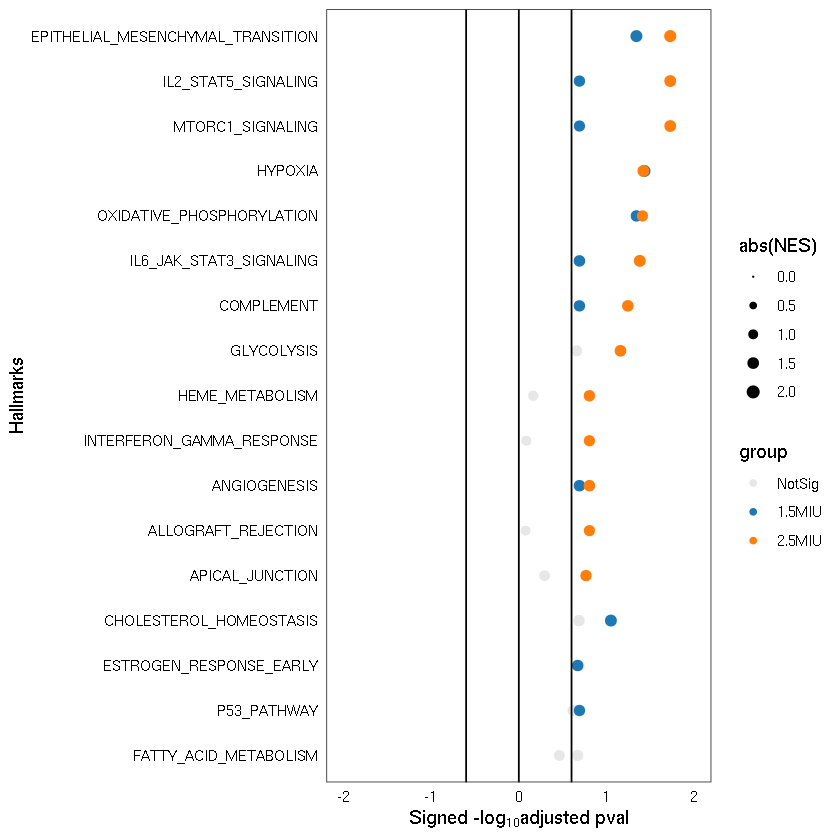

In [27]:
p3
ggsave(paste0('figures/gsea/CD4_Treg_sig.pdf'), plot = p3, w = 6, h =3, useDingbats = FALSE)

In [28]:
rankings = p3$data$ranking
names(rankings) <- row.names(p3$data)

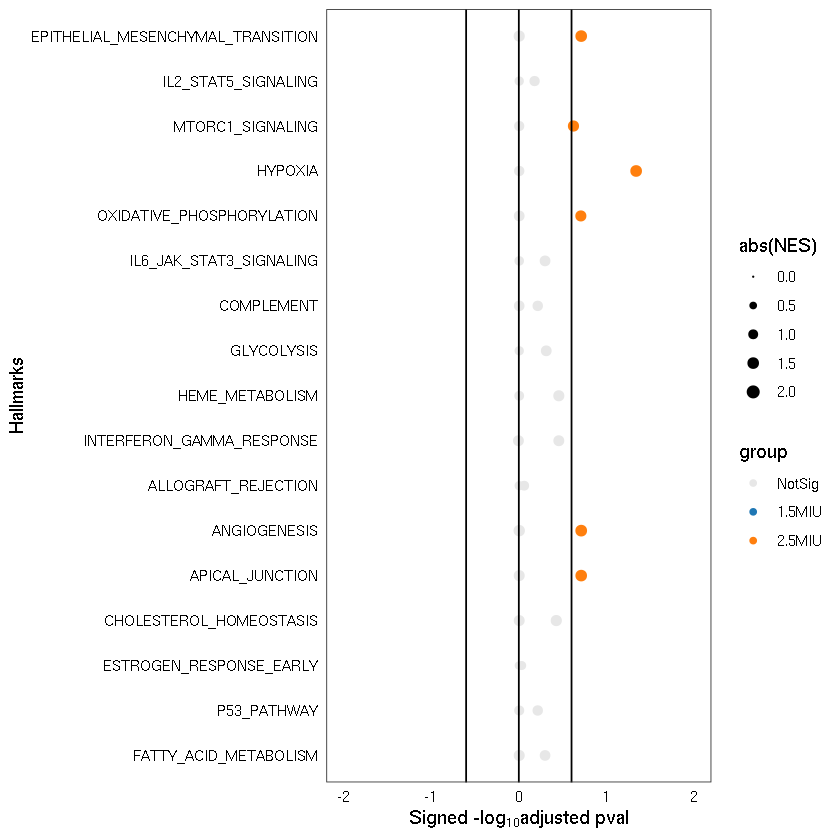

In [29]:
p1 <- plotGSEA_Hallmark2(result2x[['CD4_Tcm']], rankings[match(row.names(result2x[['CD4_Tcm']]), names(rankings))], group_ref = "2.5MIU", xlim = 2) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)
p1
ggsave(paste0('figures/gsea/CD4_Tcm_sig.pdf'), plot = p1, w = 6, h =3, useDingbats = FALSE)

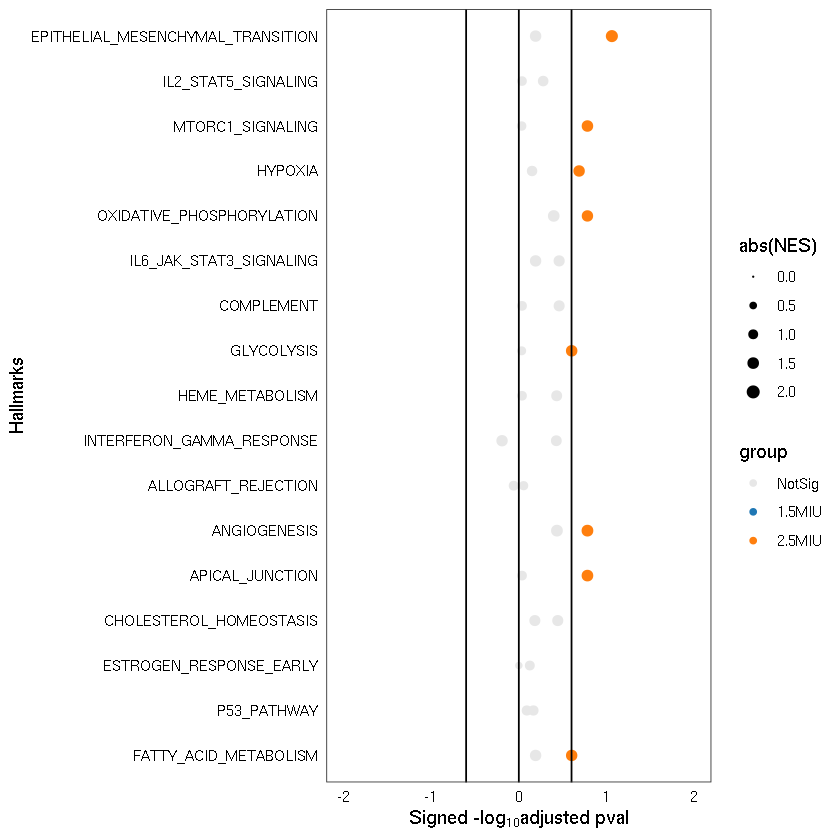

In [30]:
p2 <- plotGSEA_Hallmark2(result2x[['CD4_Tem']], rankings[match(row.names(result2x[['CD4_Tem']]), names(rankings))], group_ref = "2.5MIU", xlim = 2) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)
p2
ggsave(paste0('figures/gsea/CD4_Tem_sig.pdf'), plot = p2, w = 6, h =3, useDingbats = FALSE)

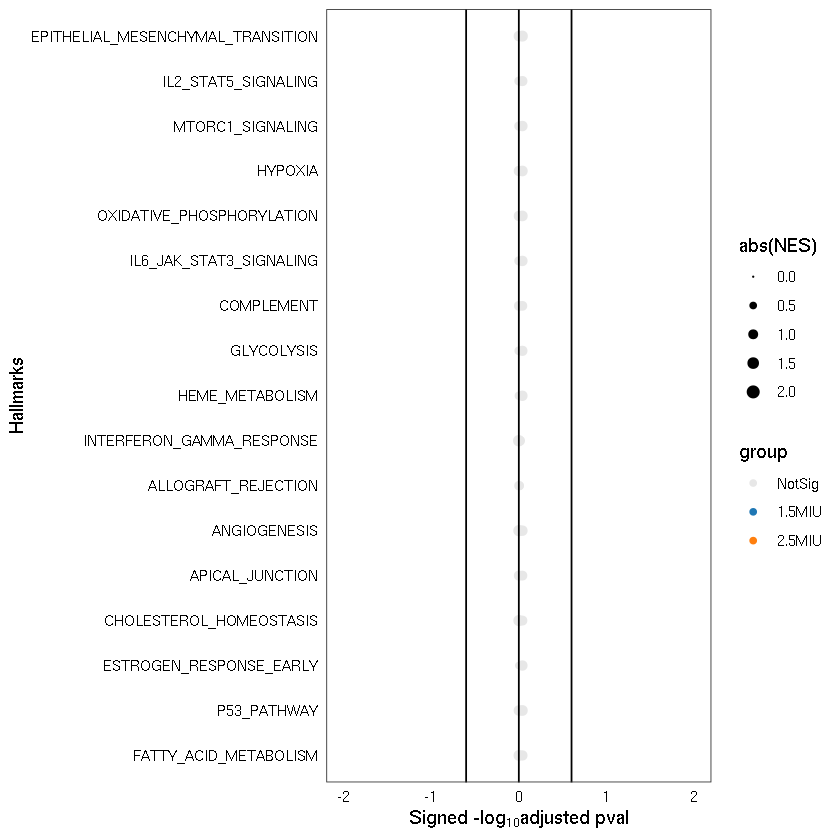

In [31]:
p0 <- plotGSEA_Hallmark2(result2x[['CD4_Tnaive']], rankings[match(row.names(result2x[['CD4_Tnaive']]), names(rankings))], group_ref = "2.5MIU", xlim = 2) + scale_color_manual(values = c('#e7e7e7' , '#1f77b4' ,'#ff7f0e'), drop=FALSE)
p0
ggsave(paste0('figures/gsea/CD4_Tnaive_sig.pdf'), plot = p0, w = 6, h =3, useDingbats = FALSE)

In [32]:
# save the GSEA results
saveRDS(result, 'figures/gsea/gsea_results.RDS')

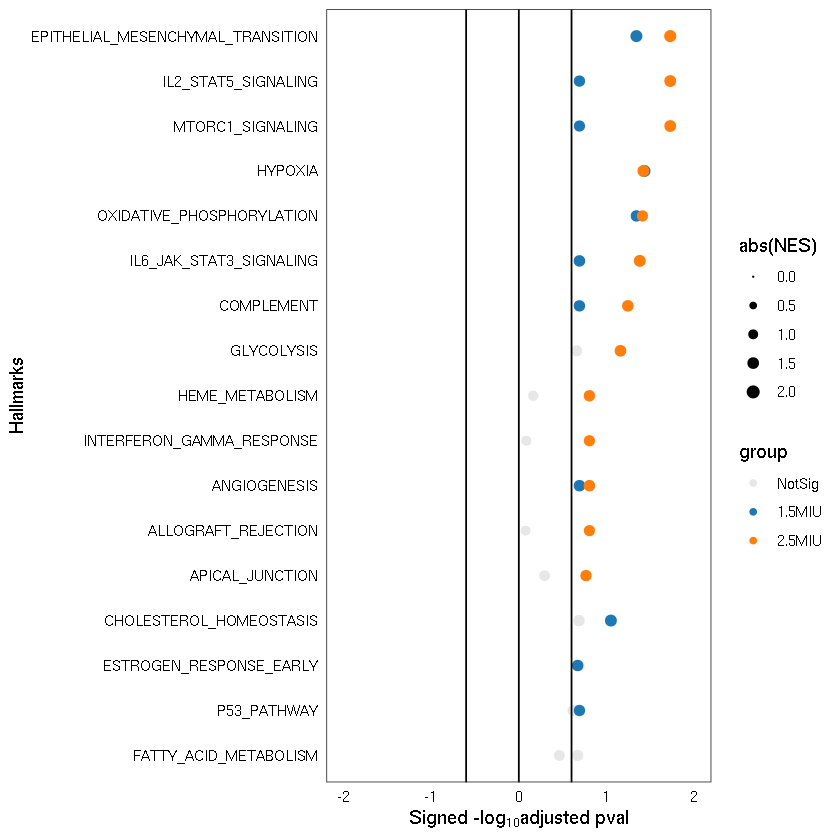

In [33]:
p3

In [34]:
result2['CD4_Treg'][[1]] %>% dplyr::filter(pathway %in% c('HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION')) %>% select(leadingEdge) %>% unlist %>% unique

[1] "LGALS1" "IL32"   "FLNA"   "TPM4"   "TGFB1"  "VIM"    "CD59"   "SAT1"  
 [9] "TIMP1"  "EMP3"

In [35]:
result2['CD4_Treg'][[1]] %>% dplyr::filter(pathway %in% c('HALLMARK_IL2_STAT5_SIGNALING')) %>% select(leadingEdge) %>% unlist %>% unique

[1] "CISH"     "LTB"      "IL2RA"    "TNFRSF18" "PIM1"     "TNFRSF4" 
 [7] "FLT3LG"   "AHNAK"    "TNFRSF1B" "BCL2"     "IL10RA"   "GSTO1"   
[13] "AHCY"     "SOCS1"    "SYNGR2"   "CCND2"

In [36]:
result2['CD4_Treg'][[1]] %>% dplyr::filter(pathway %in% c('HALLMARK_MTORC1_SIGNALING')) %>% select(leadingEdge) %>% unlist %>% unique

[1] "GAPDH"  "ENO1"   "PPIA"   "CTSC"   "GLRX"   "PRDX1"  "SHMT2"  "TCEA1" 
 [9] "SEC11A" "EIF2S2" "PPA1"   "TPI1"   "MTHFD2" "ACTR3"  "CACYBP" "HSPD1" 
[17] "ITGB2"  "ALDOA"  "CORO1A" "ARPC5L" "SERP1"  "UBE2D3" "GPI"

In [37]:
result2['CD4_Treg'][[1]] %>% dplyr::filter(pathway %in% c('HALLMARK_GLYCOLYSIS')) %>% select(leadingEdge) %>% unlist %>% unique

[1] "ENO1"   "PPIA"   "GLRX"   "TXN"    "ISG20"  "MIF"    "HAX1"   "PGLS"  
 [9] "RBCK1"  "MDH2"   "TPI1"   "SOD1"   "PGAM1"  "ALDOA"  "TALDO1" "UGP2"

In [38]:
result2['CD4_Treg'][[1]] %>% dplyr::filter(pathway %in% c('HALLMARK_OXIDATIVE_PHOSPHORYLATION')) %>% select(leadingEdge) %>% unlist %>% unique

[1] "ATP5MC2"  "COX6B1"   "ATP5F1E"  "COX5A"    "COX8A"    "ATP5MG"  
 [7] "COX7A2"   "NDUFB4"   "NDUFA6"   "UQCRQ"    "UQCR10"   "NDUFB2"  
[13] "BAX"      "COX7C"    "COX6A1"   "SLC25A6"  "NDUFA1"   "NDUFV2"  
[19] "NDUFA2"   "COX5B"    "ATP6V1F"  "COX6C"    "UQCRH"    "ATP5PF"  
[25] "COX17"    "ATP5MF"   "ATP5F1D"  "MRPS15"   "UQCRB"    "NDUFA3"  
[31] "NDUFB3"   "SLC25A5"  "COX7B"    "NDUFA4"   "UQCR11"   "OXA1L"   
[37] "ATP6V0E1" "TOMM22"   "ATP5PB"   "ATP5PD"   "NDUFS7"   "NDUFC1"  
[43] "ATP5MC3"  "ISCU"     "NDUFB1"   "ATP5F1C"  "DECR1"    "NDUFS8"  
[49] "NDUFB5"   "ACAA2"    "HSD17B10" "MDH2"     "NDUFS2"   "OGDH"    
[55] "NDUFB7"   "ECH1"     "SDHB"     "TIMM8B"   "SLC25A3"  "ATP6V1G1"
[61] "COX7A2L"  "ATP6V0B"  "GPI"      "ATP6V0C"

In [39]:
result2['CD4_Treg'][[1]] %>% dplyr::filter(pathway %in% c('HALLMARK_HYPOXIA')) %>% select(leadingEdge) %>% unlist %>% unique

[1] "S100A4" "GAPDH"  "ENO1"   "PIM1"   "GLRX"   "ISG20"  "ANXA2"  "MT2A"  
 [9] "MIF"    "TPI1"   "BCL2"   "ALDOA"  "GPI"    "UGP2"

In [1]:
setwd('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')
result <- readRDS('figures/gsea/gsea_results.RDS')

In [5]:
library(dplyr)
result[['CD4_Treg']]$`1.5MIU_vs_untreated`  %>% dplyr::filter(pathway %in% c('HALLMARK_CHOLESTEROL_HOMEOSTASIS')) %>% select(leadingEdge) %>% unlist %>% unique


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "LGALS3"  "S100A11" "ACTG1"   "ETHE1"   "ECH1"